# Nearest Neighbor Algorithm 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## CIFAR - 10 dataset
Load CIFAR - 10 dataset and implement Nearest Neighbor Algorithm to classify the images.

In [2]:

data_folder = './../Data/cifar/cifar-10/'
Xtr = np.load(data_folder + 'Xtr.npy')
ytr = np.load(data_folder + 'ytr.npy')
Xte = np.load(data_folder + 'Xte.npy')
yte = np.load(data_folder + 'yte.npy')
labels = read_dictionary = np.load(data_folder + 'labels_dict.npy',allow_pickle='TRUE').item()
true_shape = (32, 32, 3)
Xtr.shape , ytr.shape , Xte.shape , yte.shape , labels

((50000, 3072),
 (50000,),
 (10000, 3072),
 (10000,),
 {0: 'jetliner',
  1: 'shooting',
  2: 'gamecock',
  3: 'domestic',
  4: 'wapiti',
  5: 'toy',
  6: 'green',
  7: 'lippizan',
  8: 'hydrofoil',
  9: 'dustcart'})

In [3]:
def acc(y,yP):
    return np.mean(y == yP)

<Figure size 100x100 with 0 Axes>

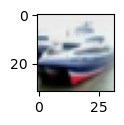

<Figure size 100x100 with 0 Axes>

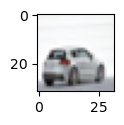

<Figure size 100x100 with 0 Axes>

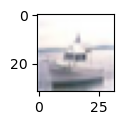

<Figure size 100x100 with 0 Axes>

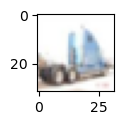

In [3]:
def nearest_neighbors(x, X):
    return np.argmin(np.linalg.norm(X - x, axis=1))

def k_nearest_neighbors(x, X, k):
    return np.argpartition(np.linalg.norm(X - x, axis=1),k)[:k]

knn = k_nearest_neighbors(Xte[1], Xtr , 3)
plt.figure(figsize=(1, 1))
plt.imshow(Xte[1].reshape(3, 32, 32).transpose(1, 2, 0)) 
plt.show()
for i in range(len(knn)):
    plt.figure(figsize=(1, 1))
    plt.imshow(Xtr[knn[i]].reshape(3, 32, 32).transpose(1, 2, 0))
    plt.show()

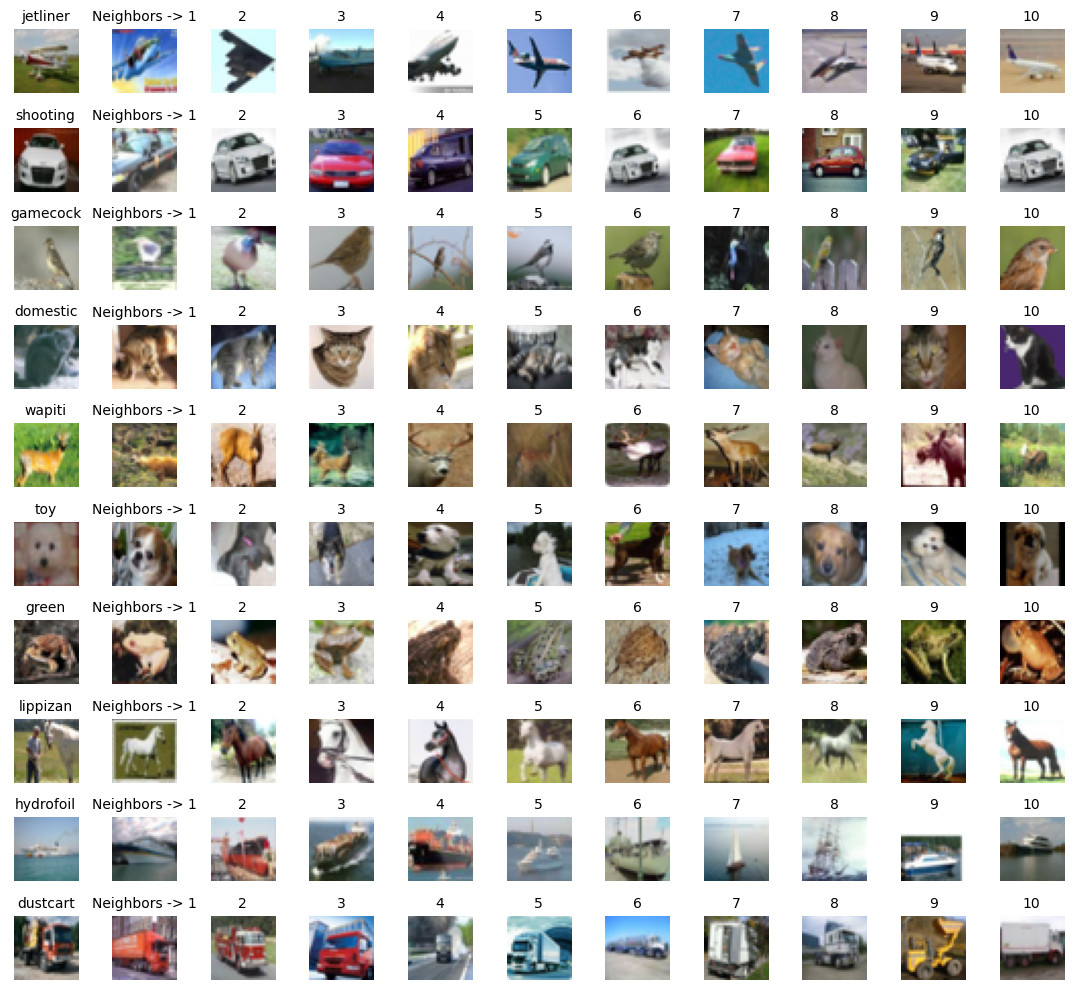

In [59]:
def plot_nearest_neighbors(X, y, labels, examples_per_class = 10, model = k_nearest_neighbors):
    examples_per_class += 1 
    num_classes = len(labels) 
    fig ,axs = plt.subplots(num_classes, examples_per_class, figsize=(examples_per_class, num_classes)) 
    for cls in labels.keys():
        cls_imgs = X[y == cls].copy()
        # np.random.shuffle(cls_imgs)
        first_example = cls_imgs[0]
        knn = model(first_example, cls_imgs[1:], examples_per_class)
        axs[cls, 0].imshow(first_example.reshape(3, 32, 32).transpose(1, 2, 0))
        for i in range(examples_per_class):
            if i == 0:
                axs[cls, i].set_title(labels[cls], fontsize=10)
            elif i == 1:
                axs[cls, i].set_title('Neighbors -> 1', fontsize=10)
            else :
                axs[cls, i].set_title(f'{i}', fontsize=10)
            axs[cls, i].imshow(cls_imgs[knn[i]].reshape(3, 32, 32).transpose(1, 2, 0))
            axs[cls, i].axis('off')
    plt.tight_layout()
    plt.show()
plot_nearest_neighbors(Xtr, ytr, labels, 10)

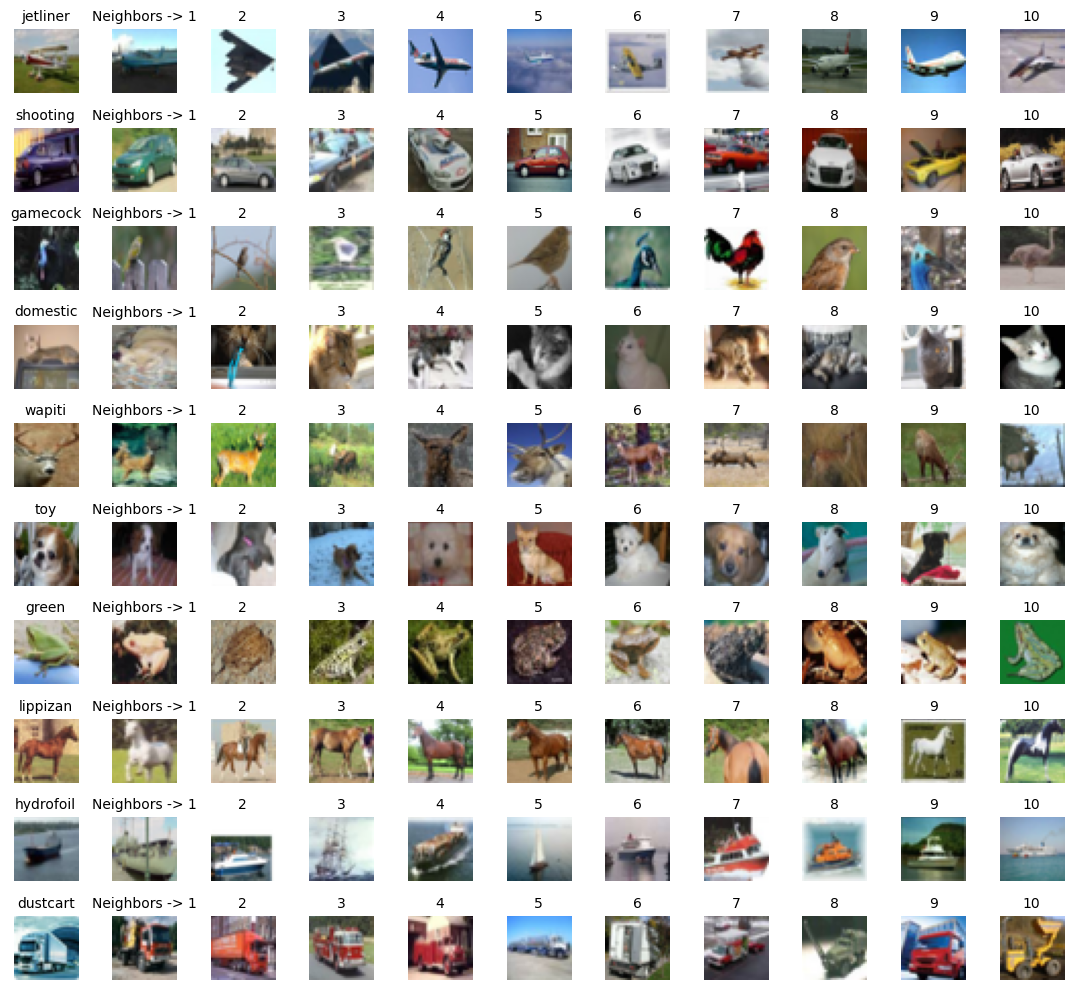

In [60]:
def k_nearest_neighbors_l1(x, X, k):
    return np.argpartition(np.sum(np.abs(X - x), axis=1),k)[:k]

plot_nearest_neighbors(Xtr, ytr, labels, 10, k_nearest_neighbors_l1)

## KNN

Demo : http://vision.stanford.edu/teaching/cs231n-demos/knn/

### Version 1 - Nearest Neighbor Algorithm

In [82]:
a = [1,2,3]
b = [3, 4, 5 ]
d = zip(a,b)
a,b = list(zip(*d))
a,b


((1, 2, 3), (3, 4, 5))

In [92]:
def d_l1(X,y):
    return np.sum(np.abs(X-y), axis=1)  # axis = 1 : norm up thru columns

def d_l2(X,y):
    return np.sqrt(np.sum((X-y)**2, axis=1))  # axis = 1 : norm up thru columns

y_pred = []
k = 9
for xte in Xte[:1000]:
    distances = d_l2(Xtr, xte)
    ds = zip(np.arange(len(distances)), distances)
    ds = sorted(ds, key=lambda x : x[1])[:k]
    idxs,_ = list(zip(*ds))
    lbs = ytr[np.array(idxs)]
    # print(lbs,type(lbs))
    counter = {}
    for l in lbs:
        counter[l] = counter.get(l, 0) + 1
    # print(counter)
    label_pred = max(counter, key=counter.get)
    # print(label_pred)
    y_pred.append(label_pred)
y_pred = np.array(y_pred)    
y_pred[:10], yte[:10]

KeyboardInterrupt: 

In [94]:
len(y_pred) # generated 1106 results in 5 min => tooo slow 

1106

In [97]:
acc(yte[:len(y_pred)], y_pred) * 100

25.135623869801083

### Version 2 - Nearest Neighbor Algorithm

In [103]:
y_pred = []
k = 9
for xte in Xte[:1000]:
    distances = d_l2(Xtr, xte)
    # print(distances.shape)
    partit = np.argpartition(distances, k)
    # print(partit[:k])
    lbs = ytr[partit[:k]]
    counter = {}
    for l in lbs:
        counter[l] = counter.get(l, 0) + 1
    label_pred = max(counter, key=counter.get)
    y_pred.append(label_pred)
y_pred = np.array(y_pred)    
y_pred[:10], yte[:10]

(array([8, 0, 8, 0, 4, 6, 3, 2, 2, 9]), array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1]))

In [104]:
len(y_pred) # generated 1000 results in 4 min => tooo slow 

1000

In [105]:
acc(yte[:len(y_pred)], y_pred) * 100

23.799999999999997

### Version 3 - Nearest Neighbor Algorithm

use counter to find the most common class among the k nearest neighbors.

In [109]:
from collections import Counter

y_pred = []
k = 9
for xte in Xte[:1000]:
    distances = d_l2(Xtr, xte)
    partit = np.argpartition(distances, k)[:k]
    lbs = ytr[partit]
    label_pred = Counter(lbs).most_common(1)[0][0]
    y_pred.append(label_pred)
y_pred = np.array(y_pred)
y_pred[:10], yte[:10]

(array([8, 0, 8, 0, 4, 6, 3, 2, 2, 9]), array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1]))

In [110]:
len(y_pred) # generated 1000 results in 4 min 10 sec => No improvement 
acc(yte[:len(y_pred)], y_pred) * 100

1000

23.799999999999997

### Version 4 - Nearest Neighbor Algorithm

optimizing distance calculation 

\begin{align*}
\text{distance} &= \sqrt{\sum_{i=1}^{n} (X_i - p_i)^2}\\
&= \| X - p \|_2 \\
&= \sqrt{X^TX - 2X^Tp + p^Tp} \\
&= \sqrt{ \| X \|_2^2 - 2X^Tp + \| p \|_2^2} 
\end{align*}

here $\|X\|$ is constant for all the images in the dataset. So, we can precalculate it and store it in the memory. 

In [113]:
y_pred = []
X_norm = np.sum(Xtr**2, axis=1)
k = 9
for xte in Xte[:1000]:
    distances = X_norm - 2 * Xtr.dot(xte) + np.sum(xte**2) 
    partit = np.argpartition(distances, k)
    lbs = ytr[partit[:k]]
    counter = {}
    for l in lbs:
        counter[l] = counter.get(l, 0) + 1
    label_pred = max(counter, key=counter.get)
    y_pred.append(label_pred)
y_pred = np.array(y_pred)    

In [114]:
len(y_pred) # generated 1000 results in 1 min 30 sec => huge improvement, can we do better ? 
acc(yte[:len(y_pred)], y_pred) * 100

1000

10.299999999999999

### Version 5 - Nearest Neighbor Algorithm 

using counter to find the most common class among the k nearest neighbors + norm optimization

In [115]:
y_pred = []
X_norm = np.sum(Xtr**2, axis=1)
k = 9
for xte in Xte[:1000]:
    distances = X_norm - 2 * Xtr.dot(xte) + np.sum(xte**2) 
    partit = np.argpartition(distances, k)
    lbs = ytr[partit[:k]]
    label_pred = Counter(lbs).most_common(1)[0][0]
    y_pred.append(label_pred)
y_pred = np.array(y_pred)    

In [116]:
len(y_pred) # generated 1000 results in 1 min 15 secs => better improvement, can we do better ? 
acc(yte[:len(y_pred)], y_pred) * 100

1000

10.299999999999999

### Version 6 - Nearest Neighbor Algorithm

can we avoid loop ? by using matrix multiplication ?
$$
Xtr \in R^{N \times D} \\
Xte \in R^{M \times D} \\
\text{distance} \in R^{M \times N} \\
$$

$$
distance(Xtr_i , Xte_j) = \| (Xtr_{ik} - Xte_{jk}) \| 
$$


In [119]:
Xtr[0].shape, Xte[1].shape
np.linalg.norm(Xtr[0] - Xte[1])

((3072,), (3072,))

7498.271067386135

\begin{align*}
\text{distance}_{i,j} &= \|(Xtr_i - Xte_j)\| \\
\end{align*}

In [ ]:
np.sqrt(np.sum((Xtr[np.newaxis, :, :] - Xte[:, np.newaxis, :]) ** 2, axis=2))

MemoryError: Unable to allocate 1.40 TiB for an array with shape (10000, 50000, 3072) and data type uint8

Unable to allocate 1.40 TiB for an array with shape (10000, 50000, 3072) and data type uint8

Thus 

### Version 7 - Nearest Neighbor Algorithm

\begin{align*}
\text{distance}_{i,j} &= \|(Xtr_i - Xte_j)\| \\
\end{align*}
can be rewritten as
\begin{align*}
D^2 &=  (Xtr_{i} - Xte_{j})^2 \\
&=  Xtr^TXtr - 2Xtr^TXte + Xte^T Xte \\
&=  \|Xtr\| - 2Xtr^TXte + \|Xte\| \\
\end{align*}

Here 

$\|Xtr\|$ and $\|Xte\|$ is constant for all the images in the test dataset. So, we can precalculate it and store it in the memory.

In [8]:
from collections import Counter

y_pred = []
Xtr_norm = np.sum(Xtr**2, axis=1).reshape(-1,1)
Xte_norm = np.sum(Xte[:1000]**2, axis=1).reshape(1,-1)
Xtr_norm.shape , Xte_norm.shape

((50000, 1), (1, 1000))

In [4]:
doted = Xtr.dot(Xte[:1000].T)
doted.shape

(50000, 1000)

In [5]:
k = 9
distances = Xtr_norm - 2 * doted + Xte_norm 
distances.shape

(50000, 1000)

In [6]:
partit = np.argpartition(distances, k, axis = 0)[:k , :] 
partit.shape

(9, 1000)

In [12]:
kn_labels = ytr[partit]
y_pred = np.array([
        Counter(kn_labels[:, i]).most_common(1)[0][0]
        for i in range(kn_labels.shape[1])
    ])
y_pred[:10], yte[:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1]))

In [15]:
y_pred = []
Xtr_norm = np.sum(Xtr**2, axis=1).reshape(-1,1)
Xte_norm = np.sum(Xte[:1000]**2, axis=1).reshape(1,-1)
Xtr_norm.shape , Xte_norm.shape
doted = Xtr.dot(Xte[:1000].T)
distances = Xtr_norm - 2 * doted + Xte_norm 
partit = np.argpartition(distances, k, axis = 0)[:k , :] 
kn_labels = ytr[partit]
y_pred = np.array([ Counter(kn_labels[:, i]).most_common(1)[0][0] for i in range(kn_labels.shape[1]) ])

((50000, 1), (1, 1000))

In [16]:
acc(yte[:len(y_pred)], y_pred) * 100 # 1000 results in 1 min 7 secs => best result so far 

10.299999999999999

### Version BUILT-IN : Nearest Neighbor Algorithm

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(Xtr, ytr)
y_pred = knn.predict(Xte)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

33.98

In [107]:
y_pred[:10], yte[:10] # took 24 seconds to generate on entire test set
acc(yte, y_pred) * 100

(array([4, 8, 8, 0, 4, 6, 6, 2, 2, 8]), array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1]))

33.98

### Why Scikit-learn is Faster

- **Efficient Data Structures**:
  - Uses **k-D trees** or **ball trees** for faster neighbor searches (\( O(\log N) \)).
  - Your implementation uses brute force (\( O(N_{\text{train}} \cdot N_{\text{test}} \cdot D) \)).

- **Optimized Linear Algebra**:
  - Relies on **BLAS/LAPACK** for fast matrix operations.
  - Your code uses NumPy, which is less optimized at low levels.

- **Compiled Code**:
  - Critical sections are implemented in **Cython** for C-level performance.
  - Your Python code has overhead in loops and function calls.

- **Parallelization**:
  - Uses **OpenMP** for multi-core processing.
  - Your implementation likely runs on a single thread.

- **Approximate Nearest Neighbors**:
  - Dynamically switches to **ANN** for high-dimensional data (trades minimal accuracy for speed).

- **Memory Management**:
  - Avoids redundant intermediate arrays during computations.
  - Your code creates temporary arrays, increasing overhead.

- **Optimized Distance Computation**:
  - Uses `sklearn.metrics.pairwise_distances` written in compiled C.
  - Your distance computations in NumPy are slower.


## Hyperparameter Tuning

Hyper parameters in knn are 
- distance metric
- number of neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

n = int(Xtr.shape[0] * 0.9)
Xtrain = Xtr[:n]
ytrain = ytr[:n]
Xval = Xtr[n:]
yval = ytr[n:] 

### Distance Metrics (d)

In [ ]:
## Terribly slow !!!

# knn_mh = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
# knn_mh.fit(Xtr, ytr)
# y_pred = knn_mh.predict(Xte)
# print(f'Distance : Manhattan')
# print(f'Accuracy : {acc(yte, y_pred) * 100:.4f}%')

KNeighborsClassifier(metric='manhattan')

In [7]:
knn_eu = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_eu.fit(Xtrain, ytrain)
y_pred = knn_eu.predict(Xval)
print(f'Distance : Euclidean')
print(f'Accuracy : {acc(yval, y_pred) * 100:.4f}%')

KNeighborsClassifier(metric='euclidean')

Distance : Euclidean
Accuracy : 33.5400%


In [17]:
knn_cs = KNeighborsClassifier(n_neighbors=k, metric='cosine')
knn_cs.fit(Xtrain, ytrain)
y_pred = knn_cs.predict(Xval)
print(f'Distance : Cosine')
print(f'Accuracy : {acc(yval, y_pred) * 100:.4f}%')

KNeighborsClassifier(metric='cosine', n_neighbors=19)

Distance : Cosine
Accuracy : 34.6000%


### Number of Neighbors (k)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Validation Error')

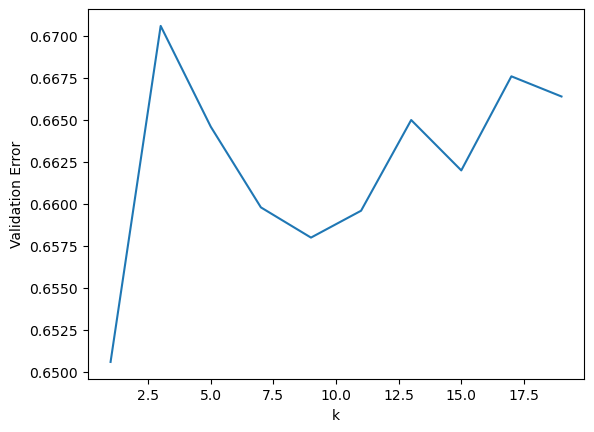

In [9]:
losses = [] 
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(Xtrain, ytrain)
    y_pred = knn.predict(Xval)
    losses.append(1 - acc(yval, y_pred))

plt.plot(range(1, 20, 2), losses)
plt.xlabel('k')
plt.ylabel('Validation Error')
plt.show()

In [14]:
ranges = list(range(1, 20, 2))
ranges[np.array(losses).argmin()]
1 - losses[np.array(losses).argmin()]

1

0.34939999999999993

found best hyperparameters as 
- distance metric : cosine
- number of neighbors : 1

In [16]:
knn_cs = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn_cs.fit(Xtr, ytr)
y_pred = knn_cs.predict(Xte)
print(f'Distance : Cosine')
print(f'Accuracy : {acc(yte, y_pred) * 100:.4f}%')

KNeighborsClassifier(metric='cosine', n_neighbors=1)

Distance : Cosine
Accuracy : 36.7200%


## Note:

---

we don't use knn for image classification in practice. (It is just for learning purpose.)